### 1. Instalasi Kaggle API

**Kode Perintah:**
```python
!pip install kaggle
```
**Hasil:**
Output status reiqurement already satisfied yang dimana kaggle telah di install dalam library python

In [1]:
!pip install kaggle

### 2. Konfigurasi Kaggle API Key


In [18]:
from google.colab import files
files.upload()
#mengunggah file kaggle.json ke lingkungan Google Colab sebagai autentikasi untuk mengakses dataset Kaggle.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riansatriapermana","key":"1ca20d9be657c2d5a9f9497b4609b23d"}'}

In [19]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

Mengonfigurasi Kaggle API agar dapat digunakan oleh sistem.
- os.makedirs() membuat folder .kaggle.
- os.rename() memindahkan file kaggle.json ke direktori yang sesuai.
- os.chmod(600) mengatur hak akses file agar aman.

In [14]:
!kaggle datasets download -d hojjatk/mnist-dataset

Dataset URL: https://www.kaggle.com/datasets/hojjatk/mnist-dataset
License(s): copyright-authors
  0% 0.00/22.0M [00:00<?, ?B/s]
100% 22.0M/22.0M [00:00<00:00, 981MB/s]


Mengunduh dataset MNIST dari Kaggle dalam format file ZIP.
- Dataset berisi citra angka tulisan tangan (0–9).
- Dataset akan digunakan sebagai data latih dan data uji.

bertujuan untuk mengunzip file mnist-dataset

In [15]:
!unzip mnist-dataset.zip

Archive:  mnist-dataset.zip
  inflating: t10k-images-idx3-ubyte/t10k-images-idx3-ubyte  
  inflating: t10k-images.idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte  
  inflating: t10k-labels.idx1-ubyte  
  inflating: train-images-idx3-ubyte/train-images-idx3-ubyte  
  inflating: train-images.idx3-ubyte  
  inflating: train-labels-idx1-ubyte/train-labels-idx1-ubyte  
  inflating: train-labels.idx1-ubyte  


Menginstal library idx2numpy untuk membaca file MNIST berformat IDX.

In [16]:
!pip install idx2numpy


  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=83e783975a6290bea024e05a32512be7fad76a9f36ff5d36e3a47253b4b536bd
  Stored in directory: /root/.cache/pip/wheels/f7/48/00/ae031c97d62f39e1c3c4daa00426c09a65eb29ae5753a189ee
Successfully built idx2numpy


# **Load DATASET MNIST**

In [17]:
import idx2numpy

x_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
x_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [20]:
# Normalisasi
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# **Membangun model MLPP (ANN)**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7969 - loss: 0.6964 - val_accuracy: 0.9470 - val_loss: 0.1882
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9518 - loss: 0.1667 - val_accuracy: 0.9632 - val_loss: 0.1317
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9680 - loss: 0.1104 - val_accuracy: 0.9669 - val_loss: 0.1113
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9760 - loss: 0.0822 - val_accuracy: 0.9678 - val_loss: 0.1080
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9823 - loss: 0.0622 - val_accuracy: 0.9680 - val_loss: 0.1112
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9855 - loss: 0.0501 - val_accuracy: 0.9710 - val_loss: 0.0969
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9876 - loss: 0.0422 - val_accuracy: 0.9707 - val_loss: 0.1029
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9909 - loss: 0.0309 - val_accuracy: 0

# **Evaluasi Model**


In [25]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.1313
Test Loss: 0.11139214783906937
Test Accuracy: 0.9696999788284302


# **Visualisasi Model**

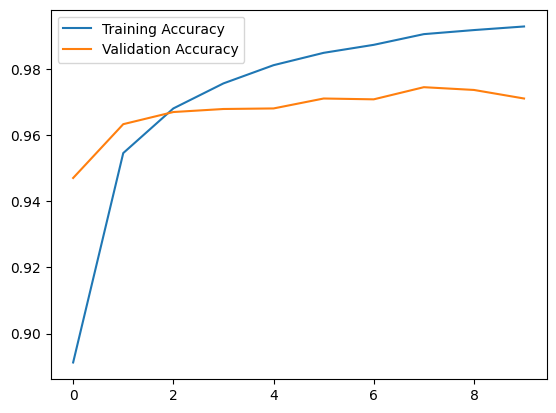

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


# **Prediksi Hasil**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


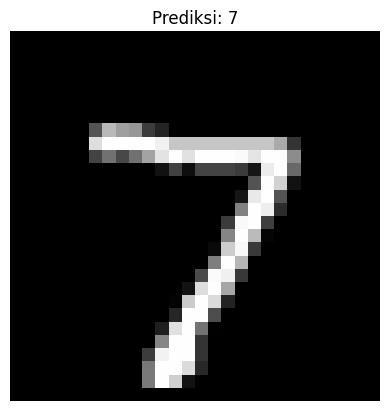

In [27]:
import numpy as np

predictions = model.predict(x_test)

plt.imshow(x_test[0], cmap='gray')
plt.title(f"Prediksi: {np.argmax(predictions[0])}")
plt.axis('off')
plt.show()
